In [ ]:
#Assignment on Artificial Neural Network Model Download the dataset of Crystal System
#Properties for Li-ion batteries Data Set: https://www.kaggle.com/datasets/divyansh22/crystal-
#system-properties-for-liion-batteries
#Consider the above dataset contains data about the
#physical and chemical properties of the Li-ion silicate cathodes. These properties can be
#useful to predict the class of a Li-ion battery. These batteries can be classified on the basis of
#their crystal system. Three major classes of crystal system include: monoclinic, orthorhombic
#and triclinic. Predict the battery classes with Artificial Neural Network (ANN) classification
#algorithm.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('lithium-ion batteries.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [35]:
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [33]:
df.describe()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
df['Spacegroup'] = label_encoder.fit_transform(df['Spacegroup'])
df['Has Bandstructure'] = df['Has Bandstructure'].astype(int)  # Convert True/False to 1/0
df['Crystal System'] = label_encoder.fit_transform(df['Crystal System'])  # Target variable
# Drop non-numeric or unnecessary columns if needed (like 'Materials Id', 'Formula')
df.drop(columns=['Materials Id', 'Formula'], inplace=True, errors='ignore')

y = label_encoder.fit_transform(y)

In [27]:
# Split features (X) and target (y)
X = df.drop('Crystal System', axis=1)  # Features (input)
y = df['Crystal System']  # Target (output)

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 3.3 MB/s eta 0:01:58
   ---------------------------------------- 0.4/385.2 MB 4.5 MB/s eta 0:01:27
   ---------------------------------------- 0.6/385.2 MB 4.4 MB/s eta 0:01:28
   ---------------------------------------- 0.8/385.2 MB 4.4 MB/s eta 0:01:27
   ---------------------------------------- 1.0/385.2 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 1.3/385.2 MB 4.5 MB/s eta 0:01:26
   ---------------------------------------- 1.4/385.2 MB 4.3 MB/s eta 0:01:30
   ---------------------------------------- 1.7/385.2 MB 4.4 MB/s eta 0:01:28
   ---------------------------------------- 2.0/385.2 MB 4.3 MB/s eta 0:01:29
   ---------------------------------------- 2.3/385.2 MB 4.4 MB/s eta 0:01:

In [30]:
from tensorflow.keras.models import Sequential
model = Sequential()


In [31]:
from tensorflow.keras.layers import Dense
model.add(Dense(units = 64, activation = 'relu' , input_dim = X_train.shape[1]))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units =3 , activation = 'softmax'))

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the ANN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [84]:
# Train the ANN model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4000 - loss: 1.0996 - val_accuracy: 0.4412 - val_loss: 1.0795
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4684 - loss: 1.0152 - val_accuracy: 0.4265 - val_loss: 1.0562
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5501 - loss: 0.9739 - val_accuracy: 0.4265 - val_loss: 1.0432
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5867 - loss: 0.9452 - val_accuracy: 0.4265 - val_loss: 1.0410
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6543 - loss: 0.8973 - val_accuracy: 0.4412 - val_loss: 1.0283
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6157 - loss: 0.8725 - val_accuracy: 0.4118 - val_loss: 1.0136
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6462 - loss: 0.8361 - val_accuracy: 0.4265 - val_loss: 0.9995
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5963 - loss: 0.8537 - val_accuracy: 0.4265 - val_loss: 0.9958

In [33]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3635 - loss: 1.0840
Test Accuracy: 36.76%


In [34]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test)

# Since the output layer has 3 units (for 3 classes), we take the argmax to get the predicted class
y_pred = y_pred_prob.argmax(axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [35]:
# Compare the predicted classes with true classes
print("Predicted classes:", y_pred[:10])
print("True classes:", y_test[:10].values)


Predicted classes: [0 0 1 0 0 2 0 0 0 0]
True classes: [2 0 0 0 0 1 1 2 2 0]


In [92]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=['monoclinic', 'orthorhombic', 'triclinic']))


              precision    recall  f1-score   support

  monoclinic       0.57      0.65      0.61        31
orthorhombic       0.50      0.47      0.49        19
   triclinic       0.73      0.61      0.67        18

    accuracy                           0.59        68
   macro avg       0.60      0.58      0.59        68
weighted avg       0.59      0.59      0.59        68



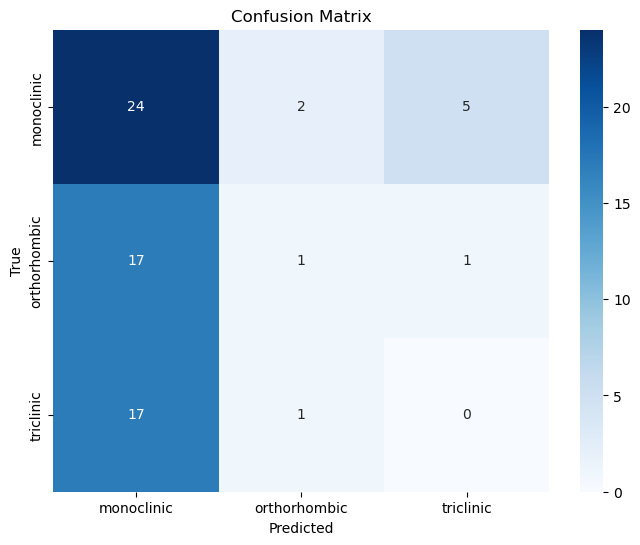

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['monoclinic', 'orthorhombic', 'triclinic'], yticklabels=['monoclinic', 'orthorhombic', 'triclinic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
